# ML in Agriculture

### Assumptions 

* If insect counts increases, chances of damaging crop increses. Also if there are more insect means us of pesticide, and pesticide also damage the crops
* Crop type and soil type also decides the crop's future
* If number of dosage of pesticide increases, chances of damaging crops increases.
* number of dosage per week also decides the chances of damaginf crop.
* Season wise there are different crops taken and different insect attack them, it could be an important attribute for selecting damage of crops

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

### Data

In [ ]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/ML in Agriculture/train.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/ML in Agriculture/test.csv')

In [ ]:
train = train.set_index('ID')
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1
F00000005,257,1,1,1,0,0.0,0,2,1
F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
ID = test['ID']
test = test.set_index('ID')
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
ID,,,,,,,,
F00000002,188,1,1,1,0,NaN,0,2
F00000007,410,1,1,1,0,0.0,0,2
F00000011,626,1,0,1,0,0.0,0,2
F00000013,731,1,0,1,0,0.0,0,2
F00000014,789,0,0,1,0,0.0,0,1


### EDA

In [ ]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88858 entries, F00000001 to F00155945
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.8+ MB


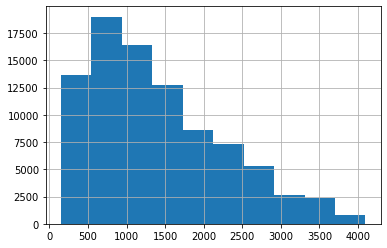

In [ ]:
train['Estimated_Insects_Count'].hist()

In [ ]:
print(train['Crop_Type'].unique())
print(train['Crop_Type'].value_counts())

[1 0]
0    63589
1    25269
Name: Crop_Type, dtype: int64


In [ ]:
print(train['Soil_Type'].unique())
print(train['Soil_Type'].value_counts())

[0 1]
0    48124
1    40734
Name: Soil_Type, dtype: int64


In [ ]:
print(train['Pesticide_Use_Category'].unique())
print(train['Pesticide_Use_Category'].value_counts())

[1 3 2]
2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64


In [ ]:
print("Number_Doses_Week ",train.Number_Doses_Week.unique())
print("Number_Weeks_Used",train.Number_Weeks_Used.unique())

Number_Doses_Week  [ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
Number_Weeks_Used [ 0. nan 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35.
 32. 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43.
 50. 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59.
 64. 13.  7.  5. 12.  6.  9. 58. 11. 65. 67.]


In [ ]:
train.Number_Weeks_Quit.unique()

array([ 0,  1,  9,  4, 13,  3, 14,  6,  2, 12, 15, 10,  8, 11,  7,  5, 17,
       18, 16, 20, 21, 19, 22, 24, 23, 27, 25, 28, 26, 29, 30, 31, 33, 32,
       36, 37, 34, 39, 44, 41, 35, 47, 46, 40, 42, 38, 43, 45, 49, 50, 48])

In [ ]:
train.Season.unique()

array([1, 2, 3])

In [ ]:
train.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

### Building Model

In [ ]:
X = train.drop('Crop_Damage',axis=1)
y = train['Crop_Damage']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
test = scaler.transform(test)

### Model 1 : DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=2)
dt.fit(X_train,y_train)
y_preds = dt.predict(X_test)

### Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=5)
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)

### Model 4 : Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, n_estimators=200)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

Model 5: SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=10,gamma=0.05)
svm.fit(X_train,y_train)
y_preds = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_preds)

0.837272113436867

In [ ]:
result = svm.predict(test)

In [ ]:
submission = pd.read_csv('drive/My Drive/Colab Notebooks/ML in Agriculture/sample_submission.csv')

In [ ]:
submission['ID'] = ID
submission['Crop_Damage'] = result
submission.to_csv('sub4.csv',index=False)